# Libraries

In [10]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import src.edhec_risk_kit as erk
import portfolio_design.src.analysis as an

from scipy import stats
from src import data


ix = pd.IndexSlice

%matplotlib inline

# Assets

In [3]:
asset_symbols = [
#   'VGRO.TO',
#   'ZDV.TO'
  'COST',
  'SOXX',
  'DHR',
#   'COUR'
#   'MTCH',
#   'BMBL',
  'ZDV.TO'
]

In [4]:
# asset_symbols_all = [
#   'STNE',
#   'SQ',
#   'PYPL',
#   'FLT',
#   'APTV',
#   'NXPI',
#   'DAN',
#   'AMD',
#   'NVDA',
#   'SJR-B.TO',
#   'IBM',
#   'MU',
#   'CUB',
#   'TCEHY',
#   'JD',
#   'T.TO',
#   'CNR.TO',
#   'DIS',
#   'CMCSA',
#   'SCR',
#   'GP',
#   'ECOM',
#   'SOXX',
#   'FISV',
#   'XPEV',
#   'LI',
#   'U',
#   'PLTR',
#   'DOC',
#   'REAL',
#   'COUR',
# ]

## Market Data

In [5]:
asset_market_data_df = (
  data
    .get_monthly_market_data(asset_symbols, interval = '1mo')
)

[*********************100%***********************]  4 of 4 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [6]:
asset_market_data_daily_df = (
  data
    .get_monthly_market_data(asset_symbols, interval = '1d')
)

[*********************100%***********************]  4 of 4 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [9]:
asset_30d_returns_df = data.compute_period_returns_from_mmd(
  asset_market_data_daily_df,
  365
)
asset_30d_returns_df

COST       DHR      SOXX    ZDV.TO
date                                              
1978-12-29       NaN       NaN       NaN       NaN
1979-01-02       NaN       NaN       NaN       NaN
1979-01-03       NaN       NaN       NaN       NaN
1979-01-04       NaN       NaN       NaN       NaN
1979-01-05       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2021-05-17  0.348979  0.696272  0.740789  0.122103
2021-05-18  0.347125  0.680276  0.692108  0.123985
2021-05-19  0.326874  0.658184  0.679590  0.117831
2021-05-20  0.365697  0.727094  0.731380  0.117631
2021-05-21  0.347987  0.678179  0.705492  0.106352

[10730 rows x 4 columns]

In [24]:
asset_180d_returns_df = data.compute_period_returns_from_mmd(
  asset_market_data_daily_df,
  180
)
asset_180d_returns_df.index = asset_180d_returns_df.index + pd.DateOffset(days = -180)

asset_30d_returns_df = data.compute_period_returns_from_mmd(
  asset_market_data_daily_df,
  365
)

asset_365d_returns_df = data.compute_period_returns_from_mmd(
  asset_market_data_daily_df,
  365
)
asset_365d_returns_df.index = asset_365d_returns_df.index + pd.DateOffset(days = -365)

asset_730d_returns_df = data.compute_period_returns_from_mmd(
  asset_market_data_daily_df,
  730
)
asset_730d_returns_df.index = asset_730d_returns_df.index + pd.DateOffset(days = -730)

## Returns Data

In [25]:
# TODO: Columns insted of dataframes

asset_1mo_returns_df = data.compute_monthly_returns_from_mmd(asset_market_data_df)
asset_1mo_returns_df.index = asset_1mo_returns_df.index + pd.DateOffset(months = -1)
asset_2mo_returns_df = data.compute_monthly_returns_from_mmd(asset_market_data_df)
asset_2mo_returns_df.index = asset_2mo_returns_df.index + pd.DateOffset(months = -2)
asset_3mo_returns_df = data.compute_period_returns_from_mmd(asset_market_data_df, periods = 3)
asset_3mo_returns_df.index = asset_3mo_returns_df.index + pd.DateOffset(months = -3)
asset_6mo_returns_df = data.compute_period_returns_from_mmd(asset_market_data_df, periods = 6)
asset_6mo_returns_df.index = asset_6mo_returns_df.index + pd.DateOffset(months = -6)
asset_12mo_returns_df = data.compute_period_returns_from_mmd(asset_market_data_df, periods = 12)
asset_12mo_returns_df.index = asset_12mo_returns_df.index + pd.DateOffset(months = -12)
asset_24mo_returns_df = data.compute_period_returns_from_mmd(asset_market_data_df, periods = 24)
asset_24mo_returns_df.index = asset_24mo_returns_df.index + pd.DateOffset(months = -24)

data.compute_period_returns_from_mmd(asset_market_data_df, periods = 24)

COST       DHR      SOXX    ZDV.TO
date                                              
1985-01-01       NaN       NaN       NaN       NaN
1985-02-01       NaN       NaN       NaN       NaN
1985-03-01       NaN       NaN       NaN       NaN
1985-04-01       NaN       NaN       NaN       NaN
1985-05-01       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2021-02-01  0.581418  0.744966  1.328970  0.092805
2021-03-01  0.520198  0.720226  1.296043  0.144453
2021-04-01  0.582616  0.933956  1.045845  0.133578
2021-05-01  0.625875  0.912291  1.251803  0.189190
2021-05-13  0.499011  0.783180  1.028902  0.177788

[438 rows x 4 columns]

In [26]:
# (
#   r1_df
#     .melt(
#       ignore_index = False,
#       var_name = 'Asset',
#       value_name = 'Return'
#     )
#     .assign(period = '1 Month')
# )

# Prices

In [27]:
def plot_closing_prices(returns_df: pd.DataFrame):
  long_df = (
    returns_df['close']
      .reset_index()
      .assign(
        period = lambda df: df['date'].apply(
          lambda d: 'pre-covid' if d <= pd.to_datetime('2020-03-01') else 'post-covid'
        )
      )
      .melt(
        id_vars = ['date', 'period'], 
        var_name = 'ticker', 
        value_name = 'price',
      )
  )

  sns.relplot(
    x = 'date',
    y = 'price',
    kind = 'line',
    col = 'ticker',
    hue = 'period',
    data = long_df,
    col_wrap = 4,
    facet_kws = {'sharey': False}
  );

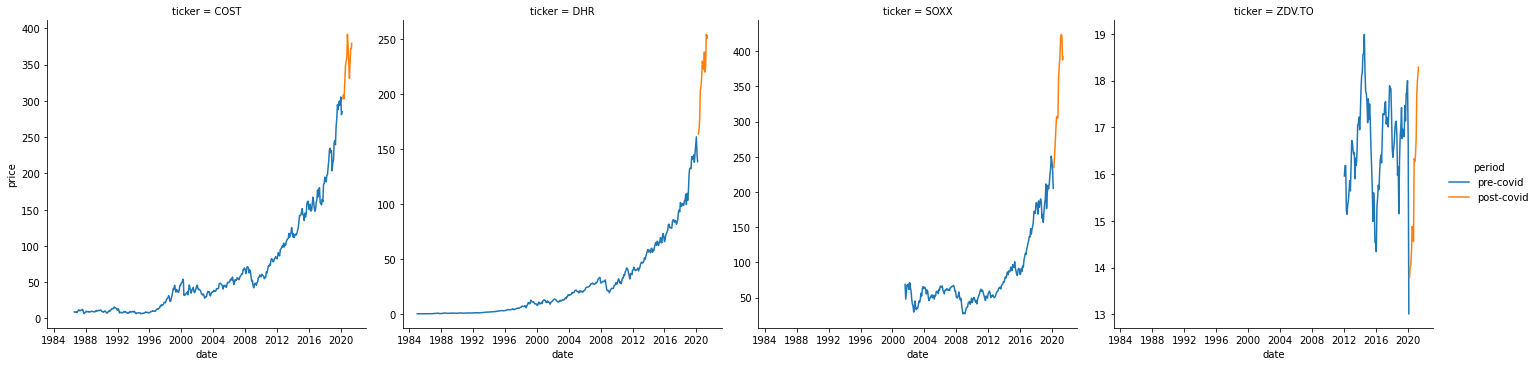

In [28]:
plot_closing_prices(asset_market_data_df)

# Return Time Series

In [29]:
def summarize_return_statistics(
  returns_df: pd.DataFrame,
  as_of: str = None):
  
  display_df = returns_df.copy()
  
  if as_of is not None:
    display_df = display_df.loc[as_of:]
  
  display(
    display_df
      .describe()
      .T
      .sort_values('mean', ascending = False)
      .assign(years = lambda df: df['count'] / 12)
      .style
      .bar(subset = ['mean', 'std'])
  )

In [30]:
def plot_returns(
  returns_df: pd.DataFrame,
  as_of: str = None):
  
  display_df = returns_df.copy()
  
  if as_of is not None:
    display_df = display_df.loc[as_of:]
    
  long_df = (
    display_df
      .reset_index()
      .assign(
        period = lambda df: df['date'].apply(
          lambda d: 'pre-covid' if d <= pd.to_datetime('2020-03-01') else 'post-covid'
        )
      )
      .melt(id_vars = ['date', 'period'], var_name = 'ticker', value_name = 'return')
  )

  f = sns.relplot(
    x = 'date',
    y = 'return',
    kind = 'line',
    col = 'ticker',
    hue = 'period',
    data = long_df,
    col_wrap = 4
  );

  f.map(plt.axhline, y = 0, ls = '--', color = 'darkgrey');

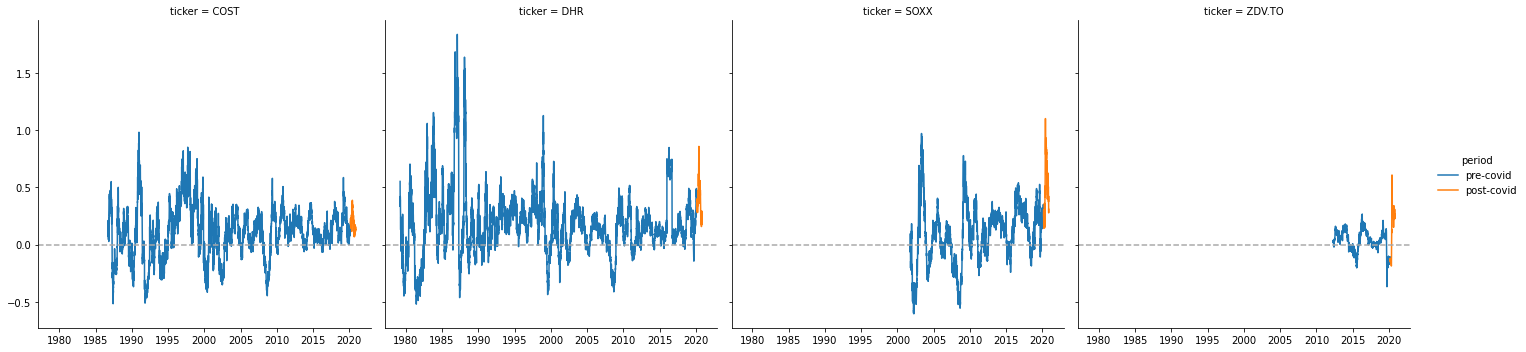

In [31]:
plot_returns(asset_180d_returns_df)

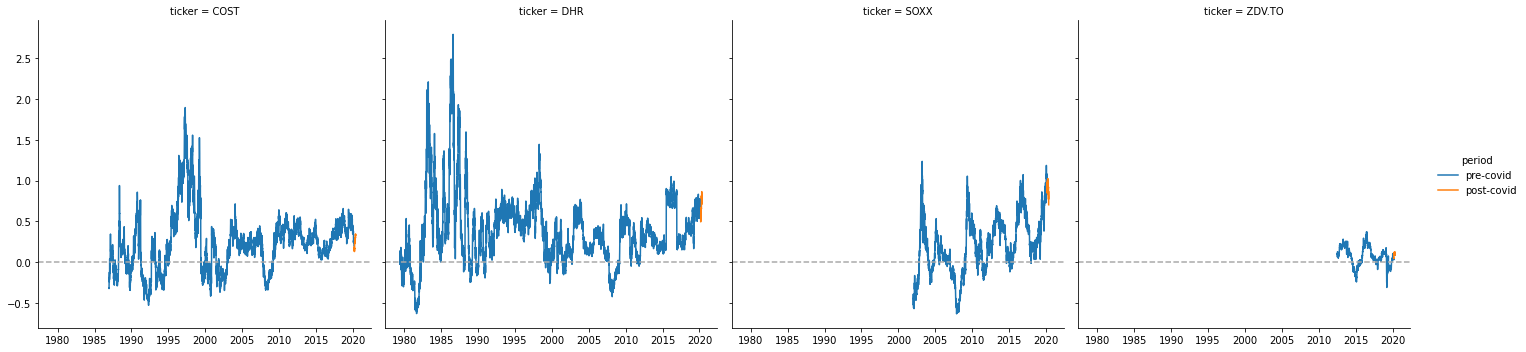

In [32]:
plot_returns(asset_365d_returns_df)

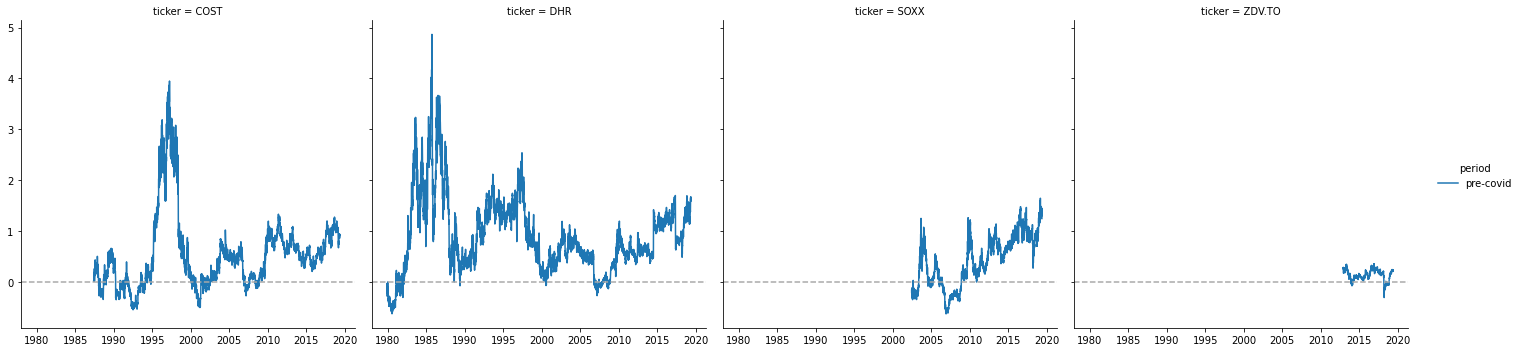

In [33]:
plot_returns(asset_730d_returns_df)

## 3 Months

In [34]:
summarize_return_statistics(asset_3mo_returns_df)

In [35]:
summarize_return_statistics(asset_3mo_returns_df, as_of = '2010-01-01')

In [36]:
summarize_return_statistics(asset_3mo_returns_df, as_of = '2015-01-01')

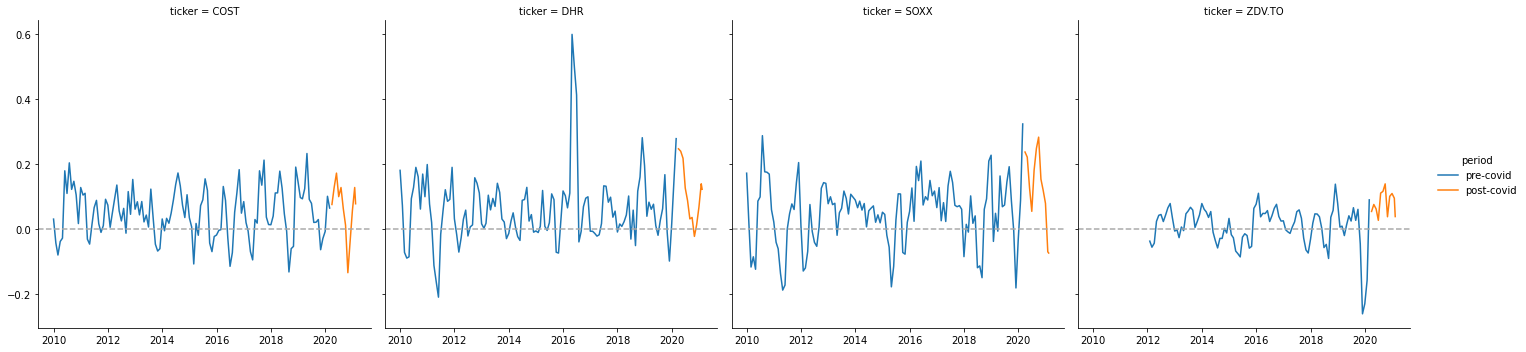

In [37]:
plot_returns(asset_3mo_returns_df, as_of = '2010-01-01')

## 12 Months

In [38]:
summarize_return_statistics(asset_12mo_returns_df)

In [39]:
summarize_return_statistics(asset_12mo_returns_df, as_of = '2010-01-01')

In [40]:
summarize_return_statistics(asset_12mo_returns_df, as_of = '2015-01-01')

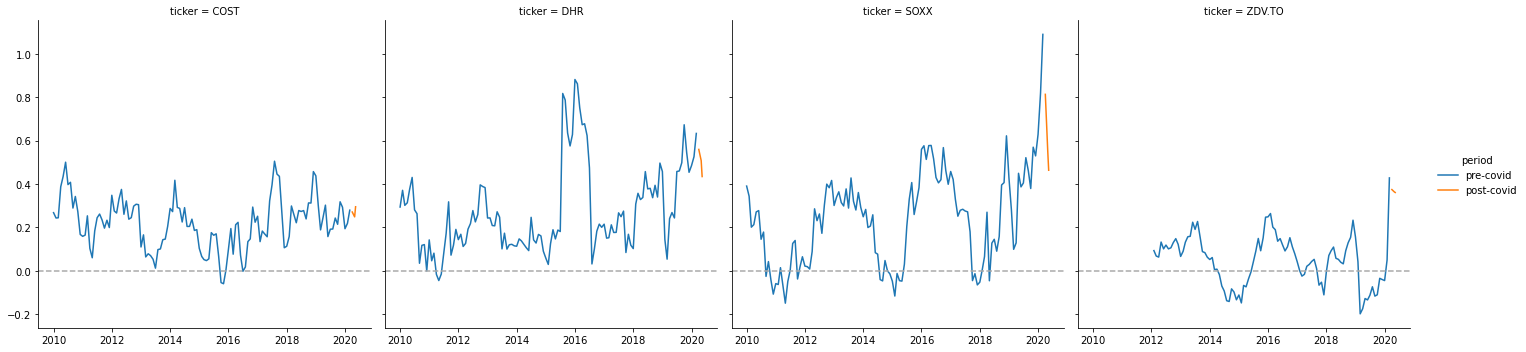

In [41]:
plot_returns(asset_12mo_returns_df, as_of = '2010-01-01')

In [42]:
asset_12mo_returns_df.tail(10)

COST       DHR      SOXX    ZDV.TO
date                                              
2019-09-01  0.242944  0.497970  0.460602 -0.116863
2019-10-01  0.214188  0.672911  0.379103 -0.110836
2019-11-01  0.317825  0.545615  0.569601 -0.034834
2019-12-01  0.292800  0.453790  0.529462 -0.040301
2020-01-01  0.193810  0.484600  0.628617 -0.045215
2020-02-01  0.218449  0.525675  0.819018  0.049503
2020-03-01  0.279192  0.632936  1.089520  0.427973
2020-04-01  0.270719  0.559301  0.813074  0.374233
2020-05-01  0.248377  0.507772  0.553875  0.363719
2020-05-13  0.295045  0.434195  0.463237  0.360726

In [43]:
asset_12mo_returns_df.mean(axis=1).tail(10)

date
2019-09-01    0.271163
2019-10-01    0.288842
2019-11-01    0.349552
2019-12-01    0.308938
2020-01-01    0.315453
2020-02-01    0.403161
2020-03-01    0.607405
2020-04-01    0.504332
2020-05-01    0.418436
2020-05-13    0.388301
dtype: float64

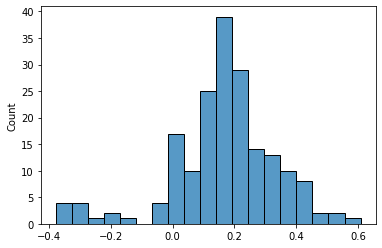

In [44]:
sns.histplot(asset_12mo_returns_df.loc['2005-01-01':].mean(axis=1));

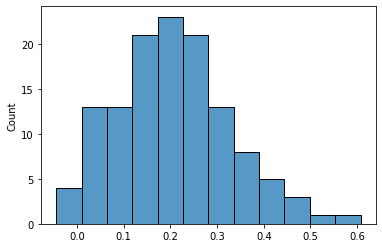

In [45]:
sns.histplot(asset_12mo_returns_df.loc['2010-01-01':].mean(axis=1));

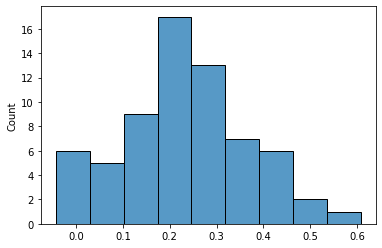

In [46]:
sns.histplot(asset_12mo_returns_df.loc['2015-01-01':].mean(axis=1));

## 24 Months

In [47]:
summarize_return_statistics(asset_24mo_returns_df)

TODO: Compare to a monthly interest rate

In [48]:
summarize_return_statistics(asset_24mo_returns_df, as_of = '2010-01-01')

In [49]:
summarize_return_statistics(asset_12mo_returns_df, as_of = '2015-01-01')

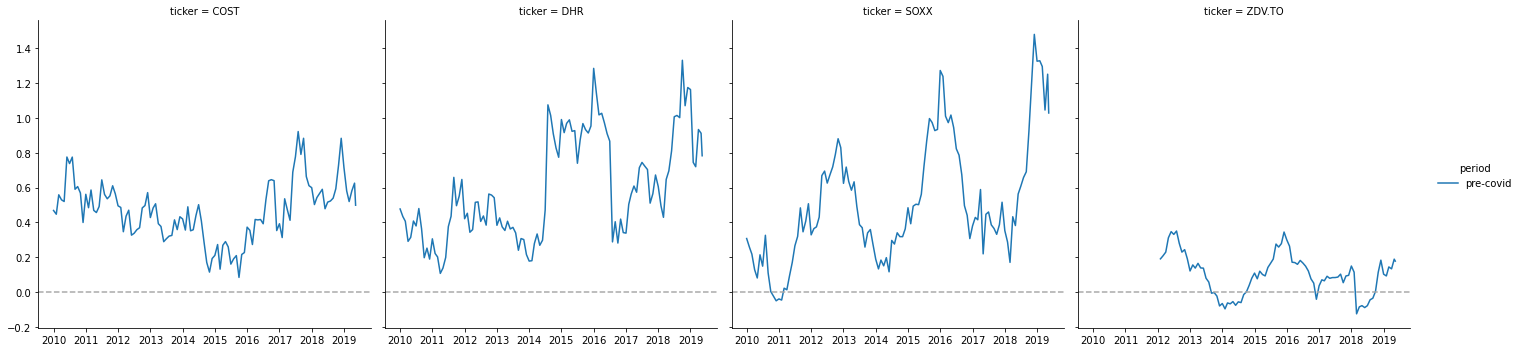

In [50]:
plot_returns(asset_24mo_returns_df, as_of = '2010-01-01')

In [51]:
asset_24mo_returns_df.sort_index(ascending = True).tail()

COST       DHR      SOXX    ZDV.TO
date                                              
2019-02-01  0.581418  0.744966  1.328970  0.092805
2019-03-01  0.520198  0.720226  1.296043  0.144453
2019-04-01  0.582616  0.933956  1.045845  0.133578
2019-05-01  0.625875  0.912291  1.251803  0.189190
2019-05-13  0.499011  0.783180  1.028902  0.177788

# Correlations

In [52]:
def plot_correlation_matrix(returns_df: pd.DataFrame, as_of: str):
  display_df = returns_df.copy()
  
  if as_of is not None:
    display_df = display_df.loc[as_of:]
  
  plt.figure(figsize = (7, 5))
  sns.heatmap(display_df.corr(), annot = True)

## 3 Months

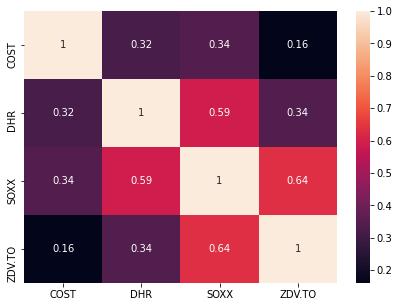

In [53]:
plot_correlation_matrix(asset_3mo_returns_df, '2010-01-01')

## 12 Months

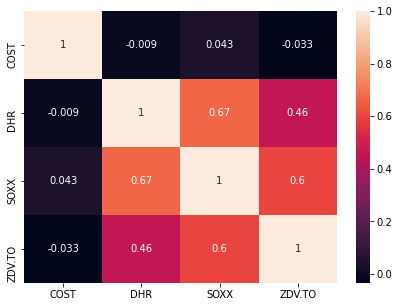

In [54]:
plot_correlation_matrix(asset_12mo_returns_df, '2010-01-01')

## 24 Months

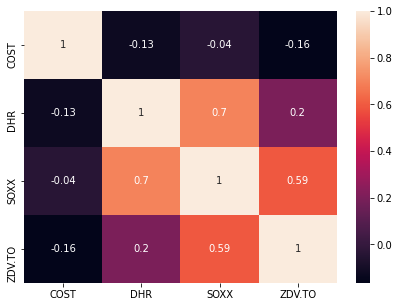

In [55]:
plot_correlation_matrix(asset_24mo_returns_df, '2010-01-01')

In [56]:
def plot_return_distributions(returns_df: pd.DataFrame, as_of: str):
  display_df = returns_df.copy()
  
  if as_of is not None:
    display_df = display_df.loc[as_of:]
    
  long_df = (
    display_df
      .reset_index()
      .assign(
        period = lambda df: df['date'].apply(
          lambda d: 'pre-covid' if d <= pd.to_datetime('2020-03-01') else 'post-covid'
        )
      )
      .melt(id_vars = ['date', 'period'], var_name = 'ticker', value_name = 'return')
  )

  f = sns.FacetGrid(
    data = long_df,
    col = 'ticker',
    #hue = 'period',
    sharey = False,
    col_wrap = 4
  )
  
  display(long_df[~long_df.isnull()]['ticker'].value_counts())

  f.map(sns.histplot, 'return');
  f.map(plt.axvline, x=0, color = 'darkred')

# Return Distributions

## 30 Days

SOXX      1628
COST      1628
ZDV.TO    1628
DHR       1628
Name: ticker, dtype: int64

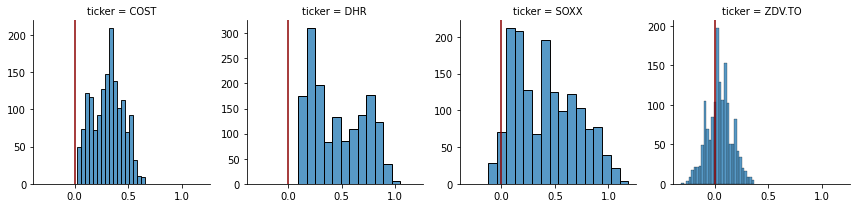

In [57]:
plot_return_distributions(asset_30d_returns_df, '2015-01-01')

## 3 Months

SOXX      135
COST      135
DHR       135
ZDV.TO    135
Name: ticker, dtype: int64

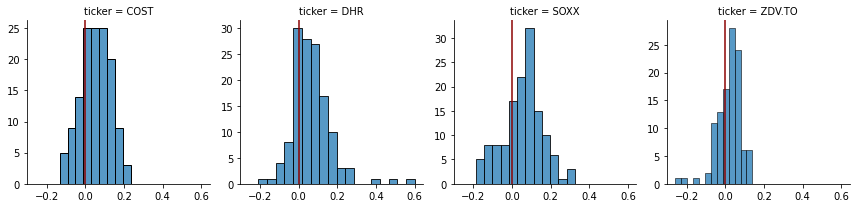

In [58]:
plot_return_distributions(asset_3mo_returns_df, '2010-01-01')

In [59]:
asset_365d_returns_df

COST       DHR      SOXX    ZDV.TO
date                                              
1977-12-29       NaN       NaN       NaN       NaN
1978-01-02       NaN       NaN       NaN       NaN
1978-01-03       NaN       NaN       NaN       NaN
1978-01-04       NaN       NaN       NaN       NaN
1978-01-05       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2020-05-07  0.342934  0.785231  0.867843  0.112932
2020-05-10  0.340765  0.776833  0.812849  0.123024
2020-05-11  0.325356  0.761705  0.787008  0.113826
2020-05-12  0.319619  0.710980  0.705675  0.109659
2020-05-13  0.337167  0.715315  0.702800  0.106253

[10724 rows x 4 columns]

SOXX      135
COST      135
DHR       135
ZDV.TO    135
Name: ticker, dtype: int64

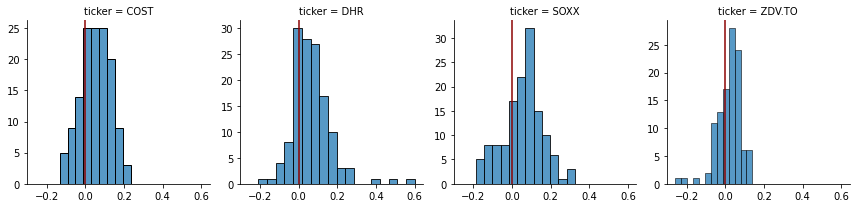

In [60]:
plot_return_distributions(asset_3mo_returns_df, '2010-01-01')

## 6 Months

SOXX      132
COST      132
DHR       132
ZDV.TO    132
Name: ticker, dtype: int64

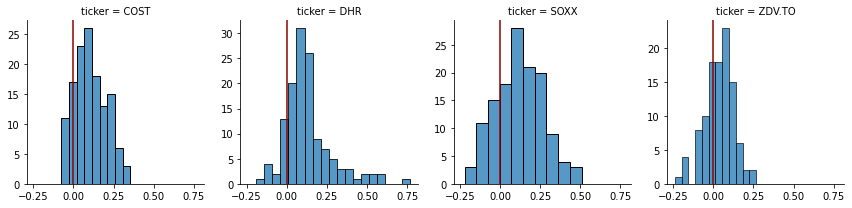

In [61]:
plot_return_distributions(asset_6mo_returns_df, '2010-01-01')

## 24 Months

SOXX      114
COST      114
DHR       114
ZDV.TO    114
Name: ticker, dtype: int64

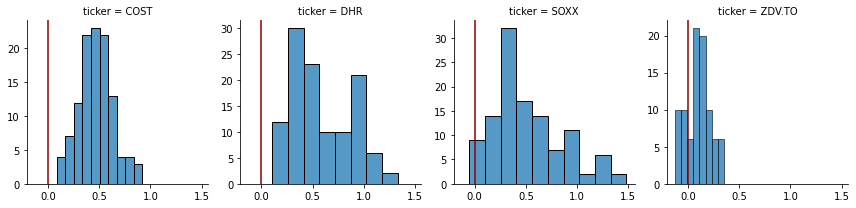

In [62]:
plot_return_distributions(asset_24mo_returns_df, '2010-01-01')

# Portfolio

In [63]:
weighted_returns_as_of = '2010-01-01'
asset_1mo_returns_period_df = asset_1mo_returns_df.loc[weighted_returns_as_of:, ]
asset_2mo_returns_period_df = asset_2mo_returns_df.loc[weighted_returns_as_of:, ]
asset_3mo_returns_period_df = asset_3mo_returns_df.loc[weighted_returns_as_of:, ]
asset_6mo_returns_period_df = asset_6mo_returns_df.loc[weighted_returns_as_of:, ]
asset_12mo_returns_period_df = asset_12mo_returns_df.loc[weighted_returns_as_of:, ]
asset_24mo_returns_period_df = asset_24mo_returns_df.loc[weighted_returns_as_of:, ]

## Time Series

Number of observations: 114


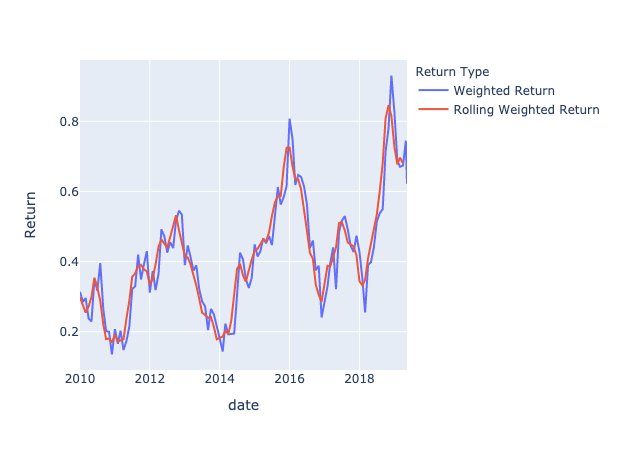

In [64]:
returns = (
  (1 / len(asset_symbols) * asset_24mo_returns_period_df)
    .sum(axis = 1)
    .rename('Weighted Return')
)
rolling_returns = (
  returns
    .rolling(3)
    .mean()
    .rename('Rolling Weighted Return')
    .shift(-2)
)
plot_df = (
  pd
    .concat([returns, rolling_returns], axis = 1)
    .reset_index()
    .melt(
      id_vars = 'date',
      value_name = 'Return',
      var_name = 'Return Type'
    )
)
print('Number of observations:', len(returns))

px.line(
  plot_df, 
  x = 'date', 
  y = 'Return', 
  color = 'Return Type'
)

We use the smoothed line to "predict" what regime we are on based on the rolling 6-year average. Probably best to pull the trigger now.

Number of observations: 134


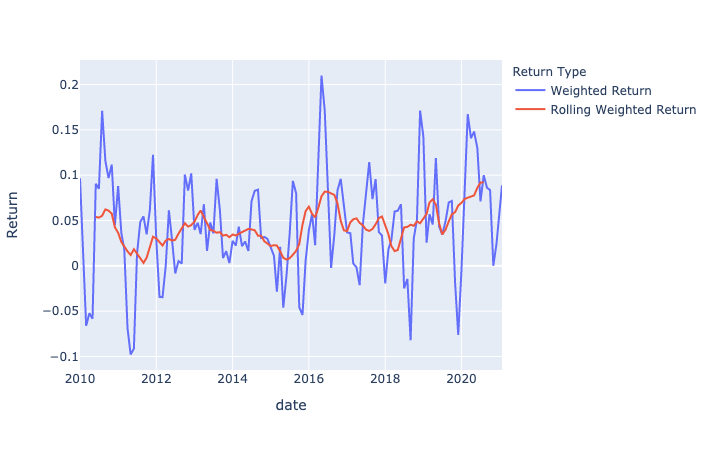

In [293]:
returns = (
  (1 / len(asset_symbols) * asset_3mo_returns_period_df)
    .sum(axis = 1)
    .rename('Weighted Return')
)
rolling_returns = (
  returns
    .rolling(12)
    .mean()
    .rename('Rolling Weighted Return')
    .shift(-6)
)
plot_df = (
  pd
    .concat([returns, rolling_returns], axis = 1)
    .reset_index()
    .melt(
      id_vars = 'date',
      value_name = 'Return',
      var_name = 'Return Type'
    )
)
print('Number of observations:', len(returns))

px.line(
  plot_df, 
  x = 'date', 
  y = 'Return', 
  color = 'Return Type'
)

## Expected Return

In [249]:
n_assets = len(asset_symbols)
equal_weights = np.repeat(1 / n_assets, n_assets)
asset_annualized_returns = erk.annualize_rets(asset_1mo_returns_period_df, periods_per_year = 24)

equal_weight_annualized_portfolio_return = erk.portfolio_return(
  equal_weights,
  asset_annualized_returns
)

r = equal_weight_annualized_portfolio_return
print('Equally Weighted Annualized Portfolio Return', round(r, 2))

Equally Weighted Annualized Portfolio Return 0.09


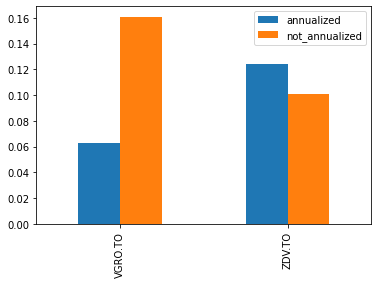

In [250]:
pd.concat([
  asset_annualized_returns.rename('annualized'),
  asset_24mo_returns_period_df.mean().rename('not_annualized')
], axis = 1).plot.bar();

So we can more or less treat annualized returns as not annualized returns.

In [251]:
asset_annualized_returns

VGRO.TO    0.063124
ZDV.TO     0.124588
dtype: float64

In [252]:
asset_24mo_returns_period_df.mean()

VGRO.TO    0.160920
ZDV.TO     0.101328
dtype: float64

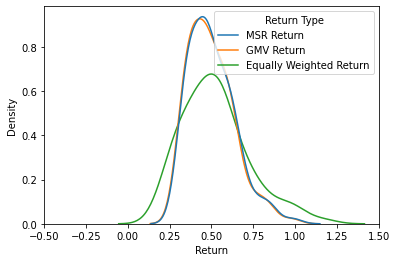

In [253]:
sns.kdeplot(data = portfolio_returns_long_df, x = 'Return', hue = 'Return Type');
plt.xlim(-0.5, 1.5);

<AxesSubplot:ylabel='Density'>

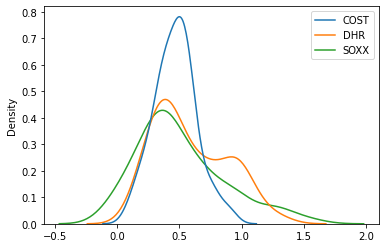

In [84]:
sns.kdeplot(data = asset_24mo_returns_period_df)

## Weights

EW Weights: [0.5 0.5]
EW Return: 0.09
MSR Weights: [0. 1.]
MSR Return: 0.12
GMV Weights: [1.00000000e+00 2.22044605e-16]
GMV Return: 0.06


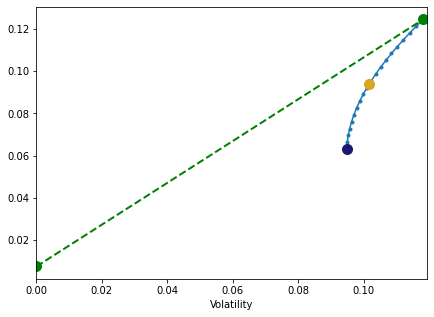

In [254]:
asset_cov = asset_24mo_returns_period_df.cov()
erk.plot_ef(
  20, 
  asset_annualized_returns, 
  asset_cov,
  show_cml = True,
  show_gmv = True,
  show_ew = True,
  riskfree_rate = 0.0075
);

## Backtest

In [43]:
                        # COST        DHR         SOXX
msr_weights = np.array([0.68449562, 0.2765573,  0.03894708])
gmv_weights = np.array([0.71874926, 0.23871065, 0.04254008])
ew_weights = equal_weights

Number of observations: 134


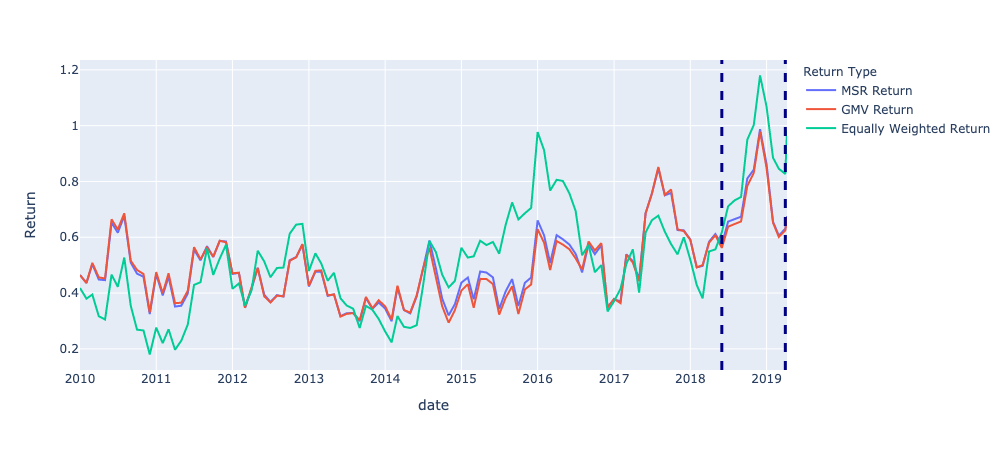

In [44]:
msr_returns = (
  (msr_weights.T * asset_24mo_returns_period_df).sum(axis = 1)
    .rename('MSR Return')
)
gmv_returns = (
  (gmv_weights.T * asset_24mo_returns_period_df).sum(axis = 1)
    .rename('GMV Return')
)
ew_returns = (
  (ew_weights.T * asset_24mo_returns_period_df).sum(axis = 1)
    .rename('Equally Weighted Return')
)
portfolio_returns_df = (
  pd
    .concat([
        msr_returns, 
        gmv_returns,
        ew_returns
      ], axis = 1
    )
)

portfolio_returns_long_df = (
  portfolio_returns_df
    .reset_index()
    .melt(
      id_vars = 'date',
      value_name = 'Return',
      var_name = 'Return Type'
    )
)

print('Number of observations:', len(returns))

f = px.line(
  portfolio_returns_long_df, 
  x = 'date', 
  y = 'Return', 
  color = 'Return Type'
)
f.add_vline(
  x='2018-06-01', 
  line_width=3, 
  line_dash="dash",
  line_color="navy")
f.add_vline(
  x='2019-04-01', 
  line_width=3, 
  line_dash="dash",
  line_color="navy")

Started a regime change in June 2018, which looks like it may be reverting back to similar returns as MSR and GMV portfolios.

In [45]:
asset_24mo_returns_period_df.apply(erk.cvar_historic)

COST   -0.142061
DHR    -0.165077
SOXX    0.023831
dtype: float64

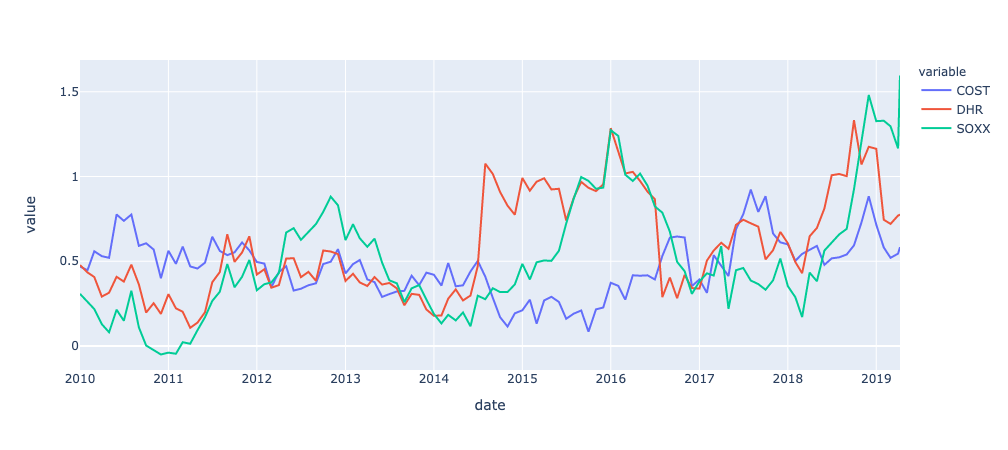

In [46]:
px.line(asset_24mo_returns_period_df)

DHR by itself has lots of upside and so does SOXX, but there is less diversity.

In [425]:
portfolio_returns_df.apply(erk.cvar_historic)

MSR Return                -0.314514
GMV Return                -0.310674
Equally Weighted Return   -0.218634
dtype: float64

In [359]:
asset_24mo_returns_period_df.apply(erk.cvar_historic)

COST   -0.142061
DHR    -0.165077
SOXX    0.023831
dtype: float64

In [360]:
portfolio_returns_df.apply(erk.cvar_historic)

MSR Return                -0.314514
GMV Return                -0.310674
Equally Weighted Return   -0.218634
dtype: float64

Equally Weighted Return    112
Name: ticker, dtype: int64

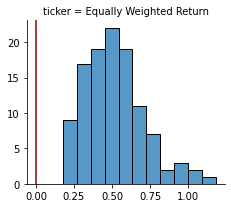

In [430]:
plot_return_distributions(portfolio_returns_df['Equally Weighted Return'], '2010-01-01')

MSR Return    135
Name: ticker, dtype: int64

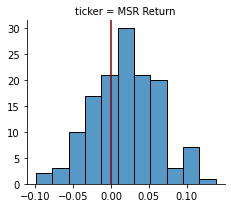

In [440]:
plot_return_distributions(
  (
    (msr_weights.T * asset_1mo_returns_period_df).sum(axis = 1)
      .rename('MSR Return')
  ),
  as_of = '2010-01-01'
)

MSR Return    124
Name: ticker, dtype: int64

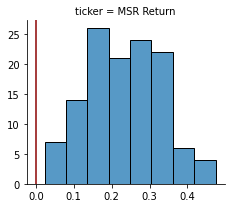

In [442]:
plot_return_distributions(
  (
    (msr_weights.T * asset_12mo_returns_period_df).sum(axis = 1)
      .rename('MSR Return')
  ),
  as_of = '2010-01-01'
)